# Download Library

In [ ]:
# pip install datasets


     ---------------------------------------- 0.0/521.2 kB ? eta -:--:--
     ----------- -------------------------- 163.8/521.2 kB 5.0 MB/s eta 0:00:01
     ---------------------------------- --- 471.0/521.2 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 521.2/521.2 kB 5.4 MB/s eta 0:00:00
     ---------------------------------------- 0.0/115.3 kB ? eta -:--:--
     ---------------------------------------- 115.3/115.3 kB ? eta 0:00:00
     ---------------------------------------- 0.0/134.8 kB ? eta -:--:--
     -------------------------------------- 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 0.0/311.7 kB ? eta -:--:--
     -------------------------------------- 311.7/311.7 kB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
      --------------------------------------- 0.5/24.6 MB 10.0 MB/s eta 0:00:03
     - -------------------------------------- 0.9/24.6 MB 9.6 MB/s eta 0:00:03
 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tokenizers 0.14.1 requires huggingface_hub<0.18,>=0.16.4, but you have huggingface-hub 0.19.4 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Andrian Rakhmatsyah\AppData\Local\Temp\pip-install-qi117zgc\tensorflow-gpu_d125d55219ce423c914326e21b107fbd\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error

# Import Library

In [ ]:
import zipfile

import os
import datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
# from keras.layers import GlobalAveragePooling2D, Flatten, InputLayer, Input, BatchNormalization, Dropout, Dense, Resizing, Rescaling, Permute

from transformers import ViTFeatureExtractor, TFViTModel, DefaultDataCollator
# from transformers import DefaultDataCollator
# import datasets

c:\Users\Andrian Rakhmatsyah\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ambil Gambar

In [ ]:
# !gdown 'https://docs.google.com/uc?export=download&id=1SmeVvq1b2Rmrkd4FLHrlL5t3T3AHQkCH'

# local_zip = '/content/datasetvit-20231126T111622Z-001.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/content')
# zip_ref.close()

Downloading...
From: https://docs.google.com/uc?export=download&id=1SmeVvq1b2Rmrkd4FLHrlL5t3T3AHQkCH
To: /content/datasetvit-20231126T111622Z-001.zip
100% 57.0M/57.0M [00:00<00:00, 121MB/s]


# Dataset dan Prapemrosesan

In [ ]:
def create_image_folder_dataset(root_path):
  """creates `Dataset` from image folder structure"""

  # get class names by folders names
  _CLASS_NAMES= os.listdir(root_path)
  # defines `datasets` features`
  features=datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
                  })
  # temp list holding datapoints for creation
  img_data_files=[]
  label_data_files=[]
  # load images into list for creation
  for img_class in os.listdir(root_path):
    for img in os.listdir(os.path.join(root_path,img_class)):
      path_=os.path.join(root_path,img_class,img)
      img_data_files.append(path_)
      label_data_files.append(img_class)
  # create dataset
  ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
  return ds

In [ ]:
dataset_train = create_image_folder_dataset(r"D:\experimen\datasetvit\train")
dataset_valid = create_image_folder_dataset(r"D:\experimen\datasetvit\valid")
dataset_test = create_image_folder_dataset(r"D:\experimen\datasetvit\test")

In [ ]:
img_class_labels = dataset_train.features["label"].names
img_class_labels

['Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil']

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

# basic processing (only resizing)
def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

# we are also renaming our label col to labels to use `.to_tf_dataset` later
dataset_train = dataset_train.rename_column("label", "labels")
dataset_valid = dataset_valid.rename_column("label", "labels")
dataset_test = dataset_test.rename_column("label", "labels")

c:\Users\Andrian Rakhmatsyah\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
processed_dataset_train = dataset_train.map(process, batched=True)
processed_dataset_valid = dataset_valid.map(process, batched=True)
processed_dataset_test = dataset_test.map(process, batched=True)
processed_dataset_train

Map: 100%|██████████| 150/150 [00:01<00:00, 90.21 examples/s]


Dataset({
    features: ['img', 'labels', 'pixel_values'],
    num_rows: 1000
})

In [ ]:
data_collator = DefaultDataCollator(return_tensors="tf")

tf_train_dataset = processed_dataset_train.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=32,
   collate_fn=data_collator)

tf_valid_dataset = processed_dataset_valid.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=True,
   batch_size=32,
   collate_fn=data_collator)

tf_test_dataset = processed_dataset_test.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=False,
   batch_size=1,
   collate_fn=data_collator)

c:\Users\Andrian Rakhmatsyah\AppData\Local\Programs\Python\Python310\lib\site-packages\datasets\arrow_dataset.py:399: FutureWarning: The output of `to_tf_dataset` will change when a passing single element list for `labels` or `columns` in the next datasets version. To return a tuple structure rather than dict, pass a single string.
Old behaviour: columns=['a'], labels=['labels'] -> (tf.Tensor, tf.Tensor)  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor)  
New behaviour: columns=['a'],labels=['labels'] -> ({'a': tf.Tensor}, {'labels': tf.Tensor})  
             : columns='a', labels='labels' -> (tf.Tensor, tf.Tensor) 
  warnings.warn(


In [ ]:
tf_test_dataset = processed_dataset_test.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=False,
   batch_size=1,
   collate_fn=data_collator)

# Pembuatan Model VIT (50 epoch)

In [ ]:
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# augmentation = keras.Sequential([
#     Resizing(224, 224),
#     Rescaling(1.0/255),
#     Permute((3, 1, 2))
# ])


# inputs
pixel_values = Input(shape=(3,224,224), name='pixel_values', dtype='float32')

# model layer
vit = base_model.vit(pixel_values)[0][:, 0, :]
x = Dense(64, activation="relu")(vit)
classifier = Dense(len(img_class_labels), activation='softmax', name='outputs')(x)

# model
keras_model = tf.keras.Model(inputs=pixel_values, outputs=classifier)
for layer in keras_model.layers[:2]:
    layer.trainable = False
# compile
keras_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.summary()

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pixel_values (InputLayer)   [(None, 3, 224, 224)]     0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0         
 SlicingOpLambda)                                                
                                                            

In [ ]:
train_results = keras_model.fit(
    tf_train_dataset,
    validation_data=tf_valid_dataset,
    epochs=50,
    verbose=1
)

Epoch 1/50


32/32 [==============================] - 50s 1s/step - loss: 1.2103 - accuracy: 0.6000 - val_loss: 0.7639 - val_accuracy: 0.8160
Epoch 2/50
32/32 [==============================] - 44s 1s/step - loss: 0.7474 - accuracy: 0.7900 - val_loss: 0.5462 - val_accuracy: 0.8560
Epoch 3/50
32/32 [==============================] - 44s 1s/step - loss: 0.5667 - accuracy: 0.8450 - val_loss: 0.4525 - val_accuracy: 0.8760
Epoch 4/50
32/32 [==============================] - 44s 1s/step - loss: 0.4794 - accuracy: 0.8640 - val_loss: 0.4154 - val_accuracy: 0.8680
Epoch 5/50
32/32 [==============================] - 44s 1s/step - loss: 0.4260 - accuracy: 0.8660 - val_loss: 0.5058 - val_accuracy: 0.7880
Epoch 6/50
32/32 [==============================] - 45s 1s/step - loss: 0.3778 - accuracy: 0.8860 - val_loss: 0.3648 - val_accuracy: 0.8640
Epoch 7/50
32/32 [==============================] - 45s 1s/step - loss: 0.3464 - accuracy: 0.8970 - val_loss: 0.3962 - val_accuracy: 0.8680
Epoch 8/50
32/32 [

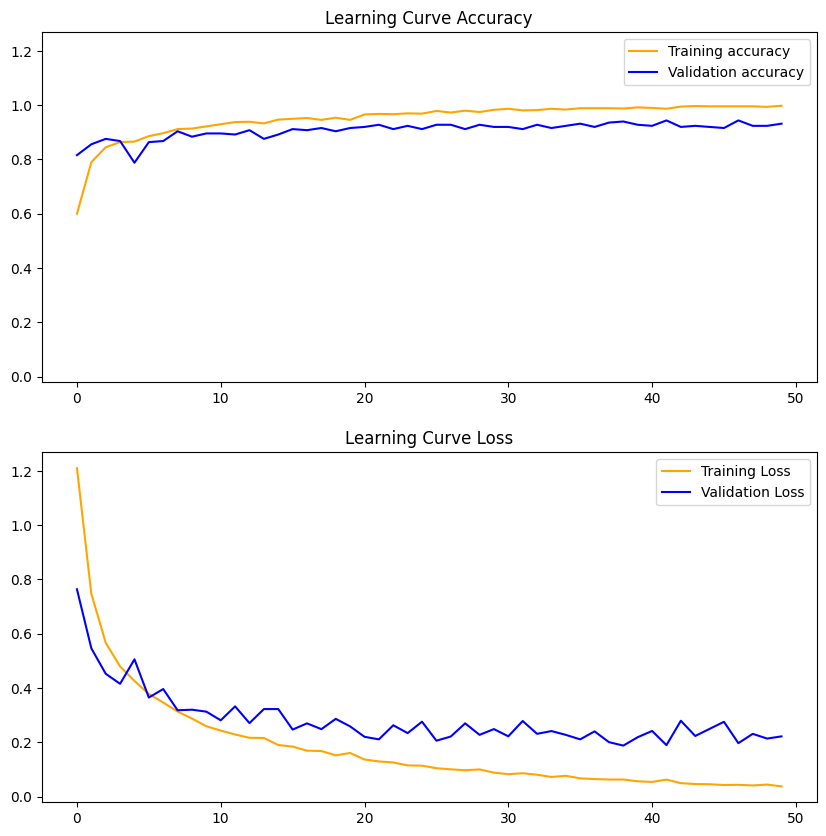

In [ ]:
acc = train_results.history['accuracy']
val_acc = train_results.history['val_accuracy']
loss = train_results.history['loss']
val_loss = train_results.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots (nrows=2, ncols=1, sharey=True, figsize=(10, 10))

ax[0].plot(epochs, acc, 'orange', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set(title='Learning Curve Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'orange', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set(title='Learning Curve Loss')
ax[1].legend()

plt.show()

In [ ]:
dic_y_mapping = {n:label for n,label in
                 enumerate(np.unique(img_class_labels))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
predicted_prob = keras_model.predict(tf_test_dataset)
tf_label_test = list(map(lambda x: x[1], tf_test_dataset))
y_test = [dic_y_mapping[pred[0].numpy()] for pred in tf_label_test]
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

150/150 [==============================] - 11s 71ms/step


              precision    recall  f1-score   support

    Basophil       1.00      1.00      1.00        30
  Eosinophil       0.72      0.97      0.83        30
  Lymphocyte       0.93      0.90      0.92        30
    Monocyte       1.00      0.97      0.98        30
  Neutrophil       1.00      0.73      0.85        30

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.91       150
weighted avg       0.93      0.91      0.91       150



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Basophil'),
  Text(0, 1.5, 'Eosinophil'),
  Text(0, 2.5, 'Lymphocyte'),
  Text(0, 3.5, 'Monocyte'),
  Text(0, 4.5, 'Neutrophil')])

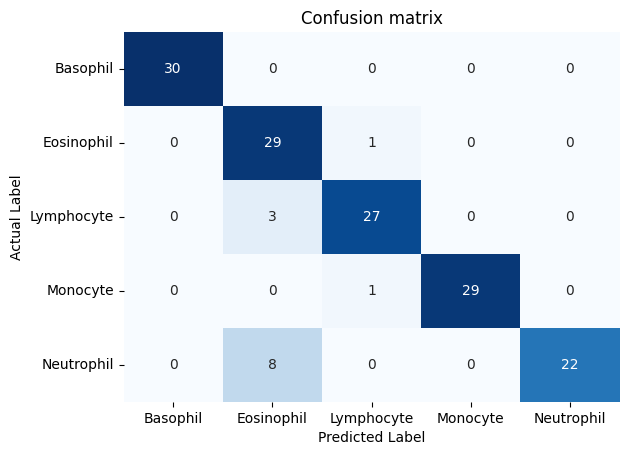

In [ ]:
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Predicted Label", ylabel="Actual Label", xticklabels=img_class_labels,
       yticklabels=img_class_labels, title="Confusion matrix")
plt.yticks(rotation=0)

# Save Model

In [ ]:
keras_model.save('vit_keras_eph50.keras')

INFO:tensorflow:Assets written to: vit_keras_eph50\assets


INFO:tensorflow:Assets written to: vit_keras_eph50\assets


# Load Model

In [ ]:
saved_model = tf.keras.models.load_model('vit_keras_eph50.keras')

# Show the model architecture
saved_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pixel_values (InputLayer)   [(None, 3, 224, 224)]     0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0         
 SlicingOpLambda)                                                
                                                             

# Evaluasi Model

In [ ]:
def create_image_folder_dataset(root_path):
  """creates `Dataset` from image folder structure"""

  # get class names by folders names
  _CLASS_NAMES= os.listdir(root_path)
  # defines `datasets` features`
  features=datasets.Features({
                      "img": datasets.Image(),
                      "label": datasets.features.ClassLabel(names=_CLASS_NAMES),
                  })
  # temp list holding datapoints for creation
  img_data_files=[]
  label_data_files=[]
  # load images into list for creation
  for img_class in os.listdir(root_path):
    for img in os.listdir(os.path.join(root_path,img_class)):
      path_=os.path.join(root_path,img_class,img)
      img_data_files.append(path_)
      label_data_files.append(img_class)
  # create dataset
  ds = datasets.Dataset.from_dict({"img":img_data_files,"label":label_data_files},features=features)
  return ds

dataset_test = create_image_folder_dataset(r"D:\experimen\datasetvit\test")

In [ ]:
feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224")

# basic processing (only resizing)
def process(examples):
    examples.update(feature_extractor(examples['img'], ))
    return examples

dataset_test = dataset_test.rename_column("label", "labels")

In [ ]:
processed_dataset_test = dataset_test.map(process, batched=True)
tf_test_dataset = processed_dataset_test.to_tf_dataset(
   columns=['pixel_values'],
   label_cols=["labels"],
   shuffle=False,
   batch_size=1,
   collate_fn=data_collator)

In [ ]:
img_class_labels = dataset_train.features["label"].names
img_class_labels

In [ ]:
dic_y_mapping = {n:label for n,label in
                 enumerate(np.unique(img_class_labels))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
predicted_prob = saved_model.predict(tf_test_dataset)
tf_label_test = list(map(lambda x: x[1], tf_test_dataset))
y_test = [dic_y_mapping[pred[0].numpy()] for pred in tf_label_test]
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

150/150 [==============================] - 11s 72ms/step


              precision    recall  f1-score   support

    Basophil       1.00      1.00      1.00        30
  Eosinophil       0.72      0.97      0.83        30
  Lymphocyte       0.93      0.90      0.92        30
    Monocyte       1.00      0.97      0.98        30
  Neutrophil       1.00      0.73      0.85        30

    accuracy                           0.91       150
   macro avg       0.93      0.91      0.91       150
weighted avg       0.93      0.91      0.91       150



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Basophil'),
  Text(0, 1.5, 'Eosinophil'),
  Text(0, 2.5, 'Lymphocyte'),
  Text(0, 3.5, 'Monocyte'),
  Text(0, 4.5, 'Neutrophil')])

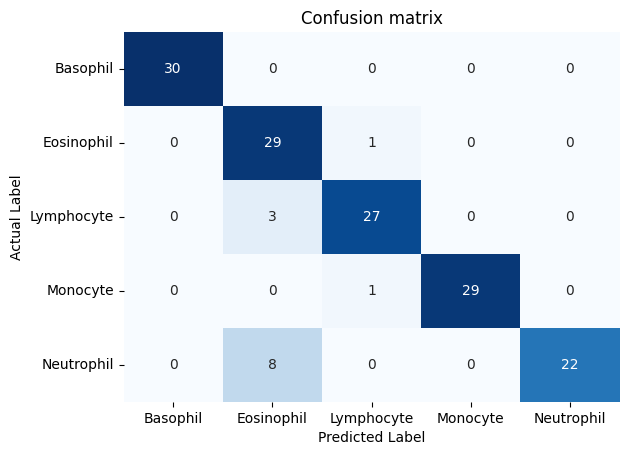

In [ ]:
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Predicted Label", ylabel="Actual Label", xticklabels=img_class_labels,
       yticklabels=img_class_labels, title="Confusion matrix")
plt.yticks(rotation=0)

# Pembuatan Model VIT (100 epoch)

In [ ]:
base_model = TFViTModel.from_pretrained('google/vit-base-patch16-224-in21k')

# augmentation = keras.Sequential([
#     Resizing(224, 224),
#     Rescaling(1.0/255),
#     Permute((3, 1, 2))
# ])


# inputs
pixel_values = Input(shape=(3,224,224), name='pixel_values', dtype='float32')

# model layer
vit = base_model.vit(pixel_values)[0][:, 0, :]
x = Dense(64, activation="relu")(vit)
classifier = Dense(len(img_class_labels), activation='softmax', name='outputs')(x)

# model
keras_model = tf.keras.Model(inputs=pixel_values, outputs=classifier)
for layer in keras_model.layers[:2]:
    layer.trainable = False
# compile
keras_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
keras_model.summary()

All model checkpoint layers were used when initializing TFViTModel.

All the layers of TFViTModel were initialized from the model checkpoint at google/vit-base-patch16-224-in21k.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTModel for predictions without further training.



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 pixel_values (InputLayer)   [(None, 3, 224, 224)]     0         
                                                                 
 vit (TFViTMainLayer)        TFBaseModelOutputWithPo   86389248  
                             oling(last_hidden_state             
                             =(None, 197, 768),                  
                              pooler_output=(None, 7             
                             68),                                
                              hidden_states=None, at             
                             tentions=None)                      
                                                                 
 tf.__operators__.getitem (  (None, 768)               0         
 SlicingOpLambda)                                                
                                                            

In [ ]:
train_results = keras_model.fit(
    tf_train_dataset,
    validation_data=tf_valid_dataset,
    epochs=100,
    verbose=1
)

Epoch 1/100


32/32 [==============================] - 50s 1s/step - loss: 1.2721 - accuracy: 0.6210 - val_loss: 0.8652 - val_accuracy: 0.7680
Epoch 2/100
32/32 [==============================] - 46s 1s/step - loss: 0.7976 - accuracy: 0.7860 - val_loss: 0.6065 - val_accuracy: 0.8360
Epoch 3/100
32/32 [==============================] - 45s 1s/step - loss: 0.5941 - accuracy: 0.8420 - val_loss: 0.4782 - val_accuracy: 0.8520
Epoch 4/100
32/32 [==============================] - 46s 1s/step - loss: 0.5032 - accuracy: 0.8440 - val_loss: 0.4357 - val_accuracy: 0.8560
Epoch 5/100
32/32 [==============================] - 46s 1s/step - loss: 0.4359 - accuracy: 0.8670 - val_loss: 0.3832 - val_accuracy: 0.8880
Epoch 6/100
32/32 [==============================] - 47s 1s/step - loss: 0.3898 - accuracy: 0.8900 - val_loss: 0.3639 - val_accuracy: 0.8880
Epoch 7/100
32/32 [==============================] - 47s 1s/step - loss: 0.3405 - accuracy: 0.9120 - val_loss: 0.4098 - val_accuracy: 0.8600
Epoch 8/100

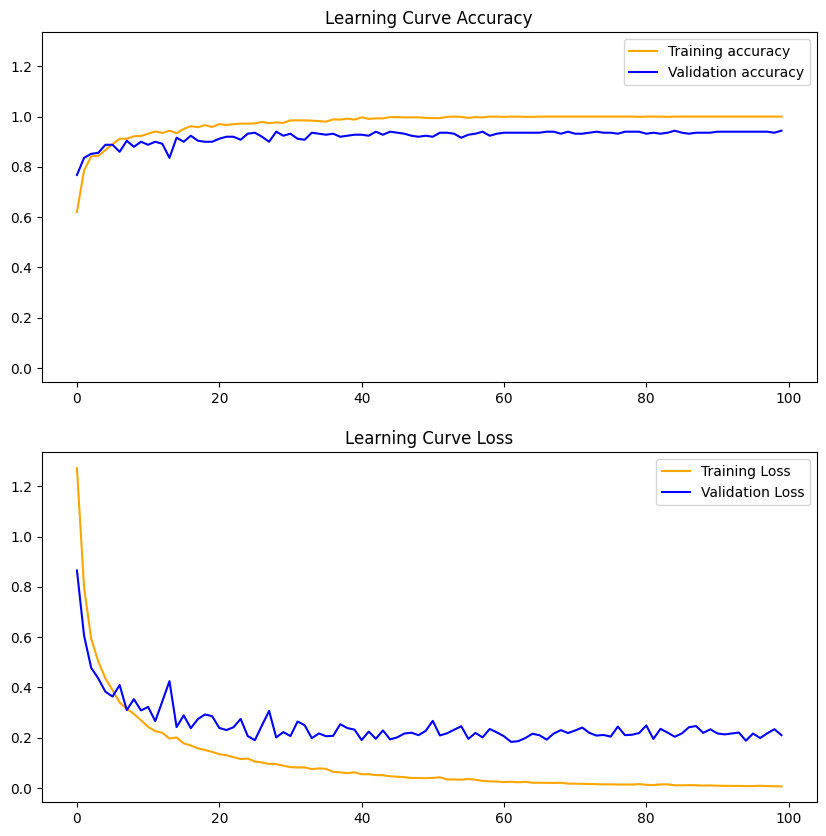

In [ ]:
acc = train_results.history['accuracy']
val_acc = train_results.history['val_accuracy']
loss = train_results.history['loss']
val_loss = train_results.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots (nrows=2, ncols=1, sharey=True, figsize=(10, 10))

ax[0].plot(epochs, acc, 'orange', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
ax[0].set(title='Learning Curve Accuracy')
ax[0].legend()

ax[1].plot(epochs, loss, 'orange', label='Training Loss')
ax[1].plot(epochs, val_loss, 'b', label='Validation Loss')
ax[1].set(title='Learning Curve Loss')
ax[1].legend()

plt.show()

In [ ]:
dic_y_mapping = {n:label for n,label in
                 enumerate(np.unique(img_class_labels))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}
predicted_prob = keras_model.predict(tf_test_dataset)
tf_label_test = list(map(lambda x: x[1], tf_test_dataset))
y_test = [dic_y_mapping[pred[0].numpy()] for pred in tf_label_test]
predicted = [dic_y_mapping[np.argmax(pred)] for pred in predicted_prob]

150/150 [==============================] - 11s 66ms/step


              precision    recall  f1-score   support

    Basophil       1.00      1.00      1.00        30
  Eosinophil       0.81      1.00      0.90        30
  Lymphocyte       0.97      0.93      0.95        30
    Monocyte       1.00      0.97      0.98        30
  Neutrophil       1.00      0.83      0.91        30

    accuracy                           0.95       150
   macro avg       0.96      0.95      0.95       150
weighted avg       0.96      0.95      0.95       150



(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'Basophil'),
  Text(0, 1.5, 'Eosinophil'),
  Text(0, 2.5, 'Lymphocyte'),
  Text(0, 3.5, 'Monocyte'),
  Text(0, 4.5, 'Neutrophil')])

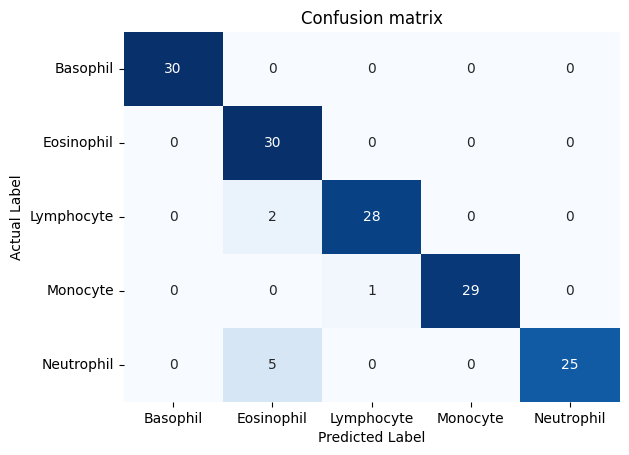

In [ ]:
print(metrics.classification_report(y_test, predicted))
cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues,
            cbar=False)
ax.set(xlabel="Predicted Label", ylabel="Actual Label", xticklabels=img_class_labels,
       yticklabels=img_class_labels, title="Confusion matrix")
plt.yticks(rotation=0)

In [ ]:
keras_model.save('vit_keras_eph100.keras')